In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
importlib.reload(ExperimentClass)
fluo_liquide = ExperimentClass.Experiment("20240305_WT3_activation", "Fluo_Liquide")
time = (fluo_liquide.Time - fluo_liquide.Time[0])/1000

fig_folder = fluo_liquide.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)



In [3]:
fluo_liquide.Data

,E11,E12,E13,E14,E15,E16,E17,E18,E19,E20,E21,E22
0,1238,1288,1301,1307,1304,1292,1293,1291,1303,1293,1308,1308
1,1245,1293,1309,1310,1302,1294,1298,1292,1304,1299,-31460,1308
2,1251,1293,1302,1309,1305,1290,1294,1295,1306,1305,1315,1305
3,1256,1293,1305,1316,1313,1303,1305,1299,1318,1298,1315,1309
4,1258,1300,1313,1316,1312,1299,1297,1295,1305,1308,1315,1306
5,1252,1301,1308,1316,1319,1297,1312,1306,1307,1303,1321,1315
6,1255,1300,1313,1321,1314,1306,1311,1306,1312,1307,1321,1315
7,1259,1302,1315,1325,1307,1303,1306,1316,1322,1309,1327,1313
8,1252,1307,1315,1322,1313,1306,1310,1307,1323,1306,1319,1316
9,1255,1306,1318,1325,1320,1298,1307,1307,1317,1316,1325,1307


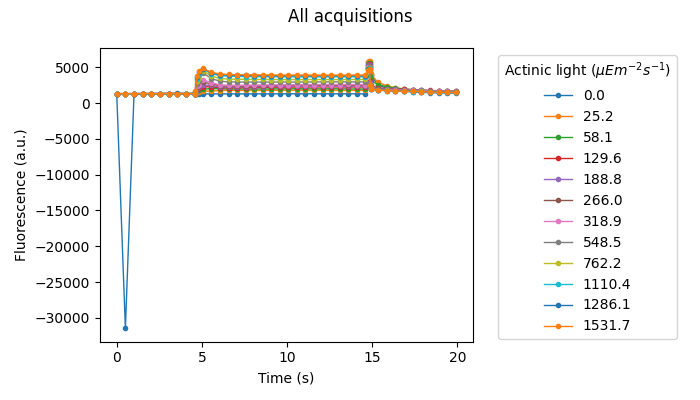

In [4]:
# visualize some acquisitions

fig, ax = plt.subplots(figsize = (7, 4))
actinic = [0, 25.2, 58.1, 129.6, 188.8, 266, 318.9, 548.5, 762.2, 1110.4, 1286.1, 1531.7]

for k, i in enumerate(fluo_liquide.Data.keys()):
    ax.plot(time , fluo_liquide.Data[i], 'o-', linewidth = 1, markersize = 3, label = f"{actinic[k]:.1f}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fluorescence (a.u.)")
ax.legend(title = "Actinic light ($µEm^{-2}s^{-1}$)", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle("All acquisitions")
fig.tight_layout()

fig.savefig(fig_folder + "/all_acquisitions.png", dpi = 300, bbox_inches = "tight")

        


In [5]:
def compute_params(Data_df, actinic):
    
    F_max = []
    F_stat = []
    F_0 = []
    phi_stat = []
    phi_0 = []
    NPQ = []
    ETR = []

    for i, key in enumerate(Data_df.keys()):
        F_max.append(np.mean(Data_df[key][33:36]))
        F_0.append(np.mean(Data_df[key][2:11]))
        F_stat.append(np.mean(Data_df[key][25:33]))
        phi_stat.append((F_max[i] - F_stat[i]) / F_max[i])
        phi_0.append((F_max[i] - F_0[i]) / F_max[i])
        NPQ.append((F_max[0] - F_max[i])/F_max[i])
        ETR.append(phi_stat[i] * actinic[i])
        
    norm = F_max[0]
    
    F_max = list(np.array(F_max)/norm)
    F_stat = list(np.array(F_stat)/norm)
    F_0 = list(np.array(F_0)/norm)
        
    params_df = pd.DataFrame({'Actinic': actinic, 'F_max': F_max, 'F_stat': F_stat, 'F_0': F_0, 'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ, 'ETR': ETR})

    
    return params_df
    
def actinic_light_axes(ax, Acquisitions_df, params_df):
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_max, '-', linewidth = 0.5, label = 'F_max')
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_0, '-', linewidth = 0.5, label = 'F_0')
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_stat, '-', linewidth = 0.5, label = 'F_stat')
    ax[0].legend()  

    ax[1].plot(Acquisitions_df.Actinic, params_df.phi_stat, '-', linewidth = 0.5, label = 'phi_stat')
    ax[1].plot(Acquisitions_df.Actinic, params_df.phi_0, '-', linewidth = 0.5, label = 'phi_0')
    ax[1].legend()

    ax[2].plot(Acquisitions_df.Actinic, params_df.NPQ, '-', linewidth = 0.5, label = 'NPQ')
    ax[2].legend()
    
    return ax
        

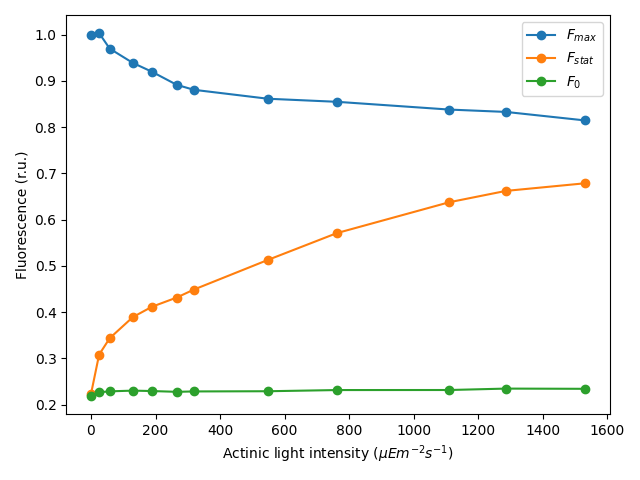

In [6]:
params_df = compute_params(fluo_liquide.Data, actinic)

fig, ax = plt.subplots()
ax.plot(actinic, params_df.F_max, 'o-', label = '$F_{max}$')
ax.plot(actinic, params_df.F_stat, 'o-', label = '$F_{stat}$')
ax.plot(actinic, params_df.F_0, 'o-', label = '$F_{0}$')


ax.set_xlabel('Actinic light intensity ($µEm^{-2}s^{-1}$)')
ax.set_ylabel('Fluorescence (r.u.)')
ax.legend()


fig.tight_layout()
fig.savefig(fig_folder + "/Fluorescence_yield.png", dpi = 300)

In [7]:
params_df

,Actinic,F_max,F_stat,F_0,phi_stat,phi_0,NPQ,ETR
0,0.0,1.000000,0.222896,0.218745,0.777104,0.781255,0.000000,0.000000
1,25.2,1.003426,0.308170,0.226855,0.692882,0.773920,-0.003414,17.460625
2,58.1,0.969920,0.343752,0.228752,0.645588,0.764154,0.031012,37.508641
3,129.6,0.939086,0.389263,0.230320,0.585487,0.754741,0.064865,75.879149
4,188.8,0.919981,0.411649,0.229429,0.552547,0.750615,0.086978,104.320848
5,266.0,0.891586,0.431704,0.227726,0.515802,0.744583,0.121597,137.203351
6,318.9,0.880901,0.448842,0.228578,0.490475,0.740519,0.135201,156.412357
7,548.5,0.861564,0.513036,0.229003,0.404529,0.734201,0.160679,221.884276
8,762.2,0.854945,0.570982,0.231558,0.332142,0.729154,0.169667,253.158546
9,1110.4,0.838163,0.637703,0.231655,0.239166,0.723616,0.193086,265.570154


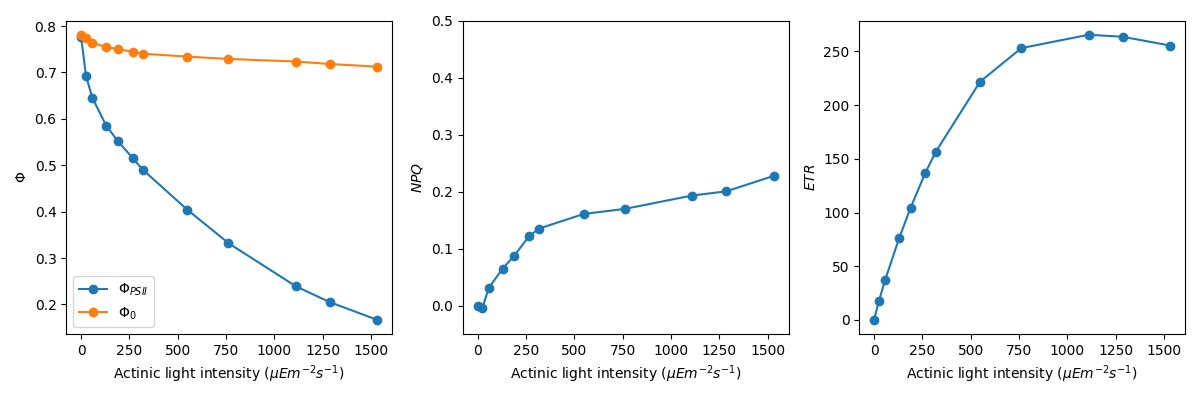

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
ax[0].plot(actinic, params_df.phi_stat, 'o-', label = '$Φ_{PSII}$')
ax[0].plot(actinic, params_df.phi_0, 'o-', label = '$Φ_{0}$')
ax[1].plot(actinic, params_df.NPQ, 'o-', label = '$NPQ$')
ax[2].plot(actinic, params_df.ETR, 'o-', label = '$ETR$')

for axes in ax:
    axes.set_xlabel('Actinic light intensity ($µEm^{-2}s^{-1}$)')
ax[0].set_ylabel('$Φ$')
ax[0].legend()
ax[1].set_ylabel('$NPQ$')
ax[1].set_ylim(-0.05, 0.5)
ax[2].set_ylabel('$ETR$')



fig.tight_layout()
fig.savefig(fig_folder + "/Params.png", dpi = 300)

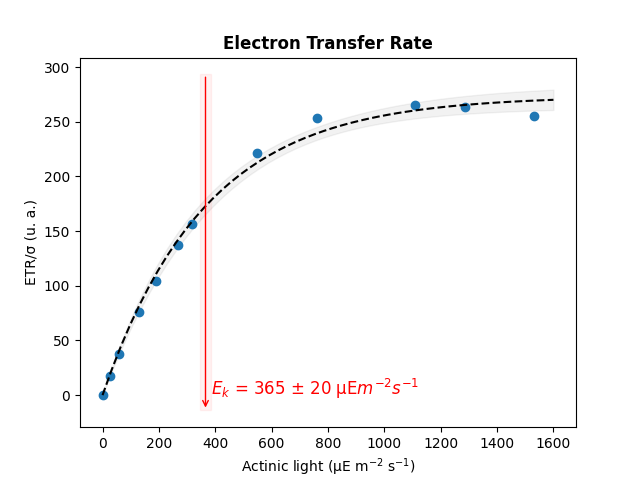

In [9]:
fig, ax = plt.subplots()
ax.set_title("Electron Transfer Rate", fontweight = 'bold')
ax.plot(actinic, params_df.ETR, 'o')


popt, pcov, xfit, yfit = tools.Ek_fit(actinic, params_df.ETR, 0, 1600, 50, p0 = [200, 200])
err = tools.my_err(xfit, popt, pcov, mf.Ek)

ax.fill_between(xfit, yfit - 1.96*err, yfit + 1.96*err, alpha=0.05, color = 'k')
ax.plot(xfit, yfit, '--', color ='k', linewidth = 1.5)
Ek = popt[1]
Ek_err = np.sqrt(np.diag(pcov))[1]
ax.annotate("", xy=(Ek, ax.get_ylim()[0]), xytext=(Ek, ax.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 1))
ax.fill_betweenx(ax.get_ylim(), Ek - Ek_err, Ek + Ek_err, color='red', alpha=0.05)
ax.text(Ek + 20, 0.05, f"$E_k$ = {Ek:.0f} ± {Ek_err:.0f} µE$m^{{-2}} s^{{-1}}$", fontsize = 12, color = "red")

ax.set_xlabel("Actinic light (µE m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("ETR/σ (u. a.)")

fig.savefig(fig_folder + "/ETR.png", dpi = 300)

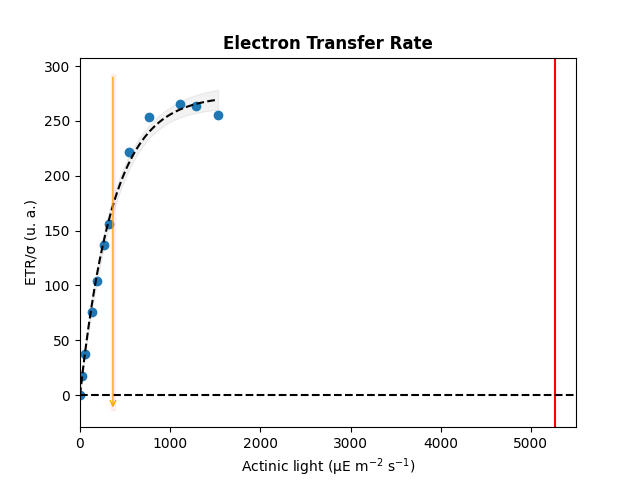

In [10]:
fig, ax = plt.subplots()
ax.set_title("Electron Transfer Rate", fontweight = 'bold')
ax.plot(actinic, params_df.ETR, 'o')


popt, pcov, xfit, yfit = tools.Ek_fit(actinic, params_df.ETR, 0, actinic[-1], 50, p0 = [200, 200])
err = tools.my_err(xfit, popt, pcov, mf.Ek)

ax.fill_between(xfit, yfit - 1.96*err, yfit + 1.96*err, alpha=0.05, color = 'k')
ax.plot(xfit, yfit, '--', color ='k', linewidth = 1.5)
Ek = popt[1]
Ek_err = np.sqrt(np.diag(pcov))[1]
ax.annotate("", xy=(Ek, ax.get_ylim()[0]), xytext=(Ek, ax.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="orange", linewidth = 1, label = "Ek"))
ax.fill_betweenx(ax.get_ylim(), Ek - Ek_err, Ek + Ek_err, color='red', alpha=0.05)

ax.set_xlim(0, 5500)
plt.axvline(x=5270, color='r', label = "Saturating pulse")
plt.axhline(y=0, color='k', linestyle='--')

ax.set_xlabel("Actinic light (µE m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("ETR/σ (u. a.)")

fig.savefig(fig_folder + "/ETR_PS.png", dpi = 300)

In [11]:
params_df.to_csv(fluo_liquide.path + f"/{fluo_liquide.name}_params.csv", index = False)